In [ ]:
import datetime
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
#for historical data
start_date = datetime.datetime(2015, 1, 5).date()
end_date = datetime.datetime.now().date()
print(start_date, end_date)
print(end_date - start_date)


2015-01-05 2025-03-18
3725 days, 0:00:00


In [ ]:
ticker="NVDA"
stock= yf.Ticker(ticker)
stock

yfinance.Ticker object <NVDA>

#Daily Data
* High: Max stock price on that particular day
* Low: Lowest price went on that particular day
* Open: Stock price opening on that particular day
* Close: Final closing price of the stock on that particular day
* Volume: Amount of stock traded on that day
* Dividends: Dividens given (if any)
* Stock Splits: Stock split happend on that particular day (if any)


In [ ]:
historical_data = stock.history(start=start_date, end=end_date, interval="1d").reset_index()
historical_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2015-01-05 00:00:00-05:00,0.483099,0.484539,0.47278,0.474940,197952000,0.0,0.0
1,2015-01-06 00:00:00-05:00,0.475659,0.476139,0.46006,0.460540,197764000,0.0,0.0
2,2015-01-07 00:00:00-05:00,0.463900,0.467980,0.45790,0.459340,321808000,0.0,0.0
3,2015-01-08 00:00:00-05:00,0.464620,0.479499,0.46438,0.476619,283780000,0.0,0.0
4,2015-01-09 00:00:00-05:00,0.478299,0.482139,0.47182,0.478539,209540000,0.0,0.0


In [ ]:
historical_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2565.000000,2565.000000,2565.000000,2565.000000,2.565000e+03,2565.000000,2565.000000
mean,22.918365,23.336241,22.443630,22.905439,4.642604e+08,0.000068,0.005458
std,35.428017,36.058000,34.638984,35.360553,2.528703e+08,0.000591,0.212631
min,0.463660,0.467980,0.454540,0.459340,5.244800e+07,0.000000,0.000000
25%,3.592621,3.652184,3.535485,3.588797,3.011600e+08,0.000000,0.000000
50%,6.615287,6.722234,6.501047,6.622850,4.120260e+08,0.000000,0.000000
75%,22.306112,22.689045,21.935804,22.299124,5.574670e+08,0.000000,0.000000
max,153.015919,153.115916,147.806407,149.416245,3.692928e+09,0.010000,10.000000


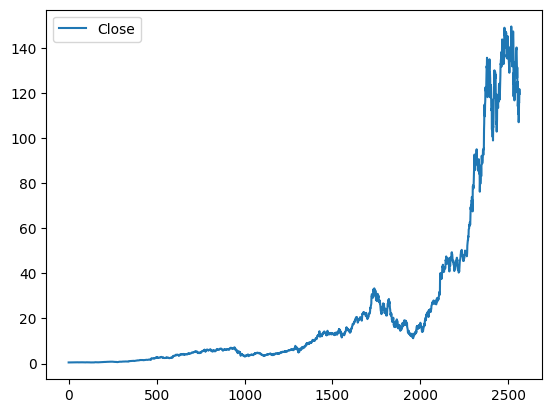

In [ ]:
fig = plt.figure()
plt.plot(historical_data.Close)
plt.legend(["Close", "Open"])

In [ ]:
#Making Features for Lag
for i in range(1, 8):
    historical_data[f"Close_lag_{i}"] = historical_data.Close.shift(periods=i, axis=0)
    historical_data[f"Open_lag_{i}"] = historical_data.Open.shift(periods=i, axis=0)
    historical_data[f"High_lag_{i}"] = historical_data.High.shift(periods=i, axis=0)
    historical_data[f"Low_lag_{i}"] = historical_data.Low.shift(periods=i, axis=0)
historical_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_lag_1,Open_lag_1,...,High_lag_5,Low_lag_5,Close_lag_6,Open_lag_6,High_lag_6,Low_lag_6,Close_lag_7,Open_lag_7,High_lag_7,Low_lag_7
0,2015-01-05 00:00:00-05:00,0.483099,0.484539,0.472780,0.474940,197952000,0.00,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-06 00:00:00-05:00,0.475659,0.476139,0.460060,0.460540,197764000,0.00,0.0,0.474940,0.483099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-07 00:00:00-05:00,0.463900,0.467980,0.457900,0.459340,321808000,0.00,0.0,0.460540,0.475659,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-08 00:00:00-05:00,0.464620,0.479499,0.464380,0.476619,283780000,0.00,0.0,0.459340,0.463900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-09 00:00:00-05:00,0.478299,0.482139,0.471820,0.478539,209540000,0.00,0.0,0.476619,0.464620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,2025-03-11 00:00:00-04:00,106.980159,112.229676,104.760361,108.750000,354865700,0.00,0.0,106.970161,109.889891,...,119.299026,110.099875,114.049507,123.498643,123.688620,112.269672,124.908508,118.009141,125.078491,116.389295
2561,2025-03-12 00:00:00-04:00,114.120003,116.760002,112.879997,115.739998,323857500,0.01,0.0,108.750000,106.980159,...,118.269121,114.499471,115.979332,110.639827,119.299026,110.099875,114.049507,123.498643,123.688620,112.269672
2562,2025-03-13 00:00:00-04:00,117.029999,117.760002,113.790001,115.580002,299033100,0.00,0.0,115.739998,114.120003,...,115.339389,110.209863,117.289215,117.569188,118.269121,114.499471,115.979332,110.639827,119.299026,110.099875
2563,2025-03-14 00:00:00-04:00,118.610001,121.879997,118.150002,121.669998,277593500,0.00,0.0,115.580002,117.029999,...,113.469570,107.550108,110.559830,113.519557,115.339389,110.209863,117.289215,117.569188,118.269121,114.499471


In [ ]:
historical_data['MA_20'] = historical_data['Close'].rolling(window=20).mean()
historical_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_lag_1,Open_lag_1,...,Low_lag_5,Close_lag_6,Open_lag_6,High_lag_6,Low_lag_6,Close_lag_7,Open_lag_7,High_lag_7,Low_lag_7,MA_20
0,2015-01-05 00:00:00-05:00,0.483099,0.484539,0.472780,0.474940,197952000,0.00,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-06 00:00:00-05:00,0.475659,0.476139,0.460060,0.460540,197764000,0.00,0.0,0.474940,0.483099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-07 00:00:00-05:00,0.463900,0.467980,0.457900,0.459340,321808000,0.00,0.0,0.460540,0.475659,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-08 00:00:00-05:00,0.464620,0.479499,0.464380,0.476619,283780000,0.00,0.0,0.459340,0.463900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-09 00:00:00-05:00,0.478299,0.482139,0.471820,0.478539,209540000,0.00,0.0,0.476619,0.464620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,2025-03-11 00:00:00-04:00,106.980159,112.229676,104.760361,108.750000,354865700,0.00,0.0,106.970161,109.889891,...,110.099875,114.049507,123.498643,123.688620,112.269672,124.908508,118.009141,125.078491,116.389295,125.531456
2561,2025-03-12 00:00:00-04:00,114.120003,116.760002,112.879997,115.739998,323857500,0.01,0.0,108.750000,106.980159,...,114.499471,115.979332,110.639827,119.299026,110.099875,114.049507,123.498643,123.688620,112.269672,124.679066
2562,2025-03-13 00:00:00-04:00,117.029999,117.760002,113.790001,115.580002,299033100,0.00,0.0,115.739998,114.120003,...,110.209863,117.289215,117.569188,118.269121,114.499471,115.979332,110.639827,119.299026,110.099875,123.901669
2563,2025-03-14 00:00:00-04:00,118.610001,121.879997,118.150002,121.669998,277593500,0.00,0.0,115.580002,117.029999,...,107.550108,110.559830,113.519557,115.339389,110.209863,117.289215,117.569188,118.269121,114.499471,123.221291


In [ ]:
historical_data.fillna(0, inplace=True)
historical_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_lag_1,Open_lag_1,...,Low_lag_5,Close_lag_6,Open_lag_6,High_lag_6,Low_lag_6,Close_lag_7,Open_lag_7,High_lag_7,Low_lag_7,MA_20
0,2015-01-05 00:00:00-05:00,0.483099,0.484539,0.47278,0.474940,197952000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-06 00:00:00-05:00,0.475659,0.476139,0.46006,0.460540,197764000,0.0,0.0,0.474940,0.483099,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-07 00:00:00-05:00,0.463900,0.467980,0.45790,0.459340,321808000,0.0,0.0,0.460540,0.475659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-08 00:00:00-05:00,0.464620,0.479499,0.46438,0.476619,283780000,0.0,0.0,0.459340,0.463900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-09 00:00:00-05:00,0.478299,0.482139,0.47182,0.478539,209540000,0.0,0.0,0.476619,0.464620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
historical_data["Date"]=historical_data["Date"].dt.strftime("%Y-%m-%d")
historical_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_lag_1,Open_lag_1,...,Low_lag_5,Close_lag_6,Open_lag_6,High_lag_6,Low_lag_6,Close_lag_7,Open_lag_7,High_lag_7,Low_lag_7,MA_20
0,2015-01-05,0.483099,0.484539,0.47278,0.474940,197952000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-06,0.475659,0.476139,0.46006,0.460540,197764000,0.0,0.0,0.474940,0.483099,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-07,0.463900,0.467980,0.45790,0.459340,321808000,0.0,0.0,0.460540,0.475659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-08,0.464620,0.479499,0.46438,0.476619,283780000,0.0,0.0,0.459340,0.463900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-09,0.478299,0.482139,0.47182,0.478539,209540000,0.0,0.0,0.476619,0.464620,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
historical_data.drop(
    columns=["Dividends", "Stock Splits", "Open", "High", "Low"], inplace=True)

In [ ]:
from prophet import Prophet

In [ ]:
validation_period = 30 # 30 days
train, validation = historical_data.iloc[:-validation_period], historical_data.iloc[-validation_period:]
train.shape, validation.shape

((2535, 32), (30, 32))

In [ ]:
lag_features = [col for col in historical_data.columns if "lag" in col]

In [ ]:
model =Prophet(yearly_seasonality=True, weekly_seasonality=True, seasonality_mode="additive")
for i in lag_features:
    model.add_regressor(i)
model.add_regressor("Volume")
model.add_regressor("MA_20")

model.fit(df=train.rename(columns={"Date": "ds", "Close":"y"}))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp70vppi3n/x4c9t9ty.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp70vppi3n/8mkd5niu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91034', 'data', 'file=/tmp/tmp70vppi3n/x4c9t9ty.json', 'init=/tmp/tmp70vppi3n/8mkd5niu.json', 'output', 'file=/tmp/tmp70vppi3n/prophet_modelnys46glo/prophet_model-20250318122945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:29:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:29:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model.predict(validation[[col for col in validation.columns if col != "Close"]].rename(columns={"Date": "ds"}))

forecast.shape

(30, 112)

In [ ]:
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Close_lag_1,Close_lag_1_lower,Close_lag_1_upper,Close_lag_2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2025-02-03,20.966031,122.310481,125.728215,20.966031,20.966031,91.420129,91.420129,91.420129,11.644897,...,3.454095,3.454095,3.454095,-0.013593,-0.013593,-0.013593,0.0,0.0,0.0,124.010824
1,2025-02-04,20.969713,117.867497,121.111602,20.969713,20.969713,88.252413,88.252413,88.252413,11.127304,...,3.458891,3.458891,3.458891,-0.001146,-0.001146,-0.001146,0.0,0.0,0.0,119.493531
2,2025-02-05,20.973395,120.170279,123.329816,20.973395,20.973395,90.101021,90.101021,90.101021,10.741935,...,3.445826,3.445826,3.445826,0.011119,0.011119,0.011119,0.0,0.0,0.0,121.824768
3,2025-02-06,20.977077,124.521352,127.933042,20.977077,20.977077,95.841927,95.841927,95.841927,10.966828,...,3.496764,3.496764,3.496764,0.022949,0.022949,0.022949,0.0,0.0,0.0,126.273201
4,2025-02-07,20.980759,128.736065,131.885970,20.980759,20.980759,99.418370,99.418370,99.418370,11.665240,...,3.380096,3.380096,3.380096,0.034111,0.034111,0.034111,0.0,0.0,0.0,130.276714
5,2025-02-10,20.991804,130.260365,133.618791,20.991804,20.991804,100.495955,100.495955,100.495955,12.100333,...,3.454095,3.454095,3.454095,0.061611,0.061611,0.061611,0.0,0.0,0.0,131.911298
6,2025-02-11,20.995486,133.002373,136.247618,20.995486,20.995486,103.960955,103.960955,103.960955,12.231427,...,3.458891,3.458891,3.458891,0.068290,0.068290,0.068290,0.0,0.0,0.0,134.707149
7,2025-02-12,20.999168,131.684680,134.924052,20.999168,20.999168,103.245665,103.245665,103.245665,12.652963,...,3.445826,3.445826,3.445826,0.073574,0.073574,0.073574,0.0,0.0,0.0,133.305323
8,2025-02-13,21.002850,130.091692,133.379388,21.002850,21.002850,101.703605,101.703605,101.703605,12.565944,...,3.496764,3.496764,3.496764,0.077437,0.077437,0.077437,0.0,0.0,0.0,131.709206
9,2025-02-14,21.006531,133.830088,137.063388,21.006531,21.006531,105.558740,105.558740,105.558740,12.378344,...,3.380096,3.380096,3.380096,0.079891,0.079891,0.079891,0.0,0.0,0.0,135.409452


In [ ]:
import pandas as pd
import plotly.graph_objects as go

historical_data['Date'] = pd.to_datetime(historical_data['Date'])
forecast['ds'] = pd.to_datetime(forecast['ds'])


fig = go.Figure()

#actual data
fig.add_trace(go.Scatter(
    x=historical_data['Date'].iloc[-365:],
    y=historical_data['Close'].iloc[-365:],
    mode='lines',
    name='Actual'
))

# forecasted data
fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat'],
    mode='lines',
    name='Forecast'
))

# Plot uncertainty as a filled area between forecast lower and upper bounds
fig.add_trace(go.Scatter(
    x=list(forecast['ds']) + list(forecast['ds'][::-1]),
    y=list(forecast['yhat_upper']) + list(forecast['yhat_lower'][::-1]),
    fill='toself',
    fillcolor='rgba(0, 100, 80, 0.2)',  # semi-transparent fill color
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    name="Forecast Uncertainty"
))

fig.update_layout(
    title=f"{ticker}_Model_Forecast_Analysis",
    xaxis_title="Date",
    yaxis_title="Predicted `Close` Price of Stock",
    hovermode="x unified",
    template="plotly_white"
)
fig.show()
